# Predicting Heart Attack with ML

Data set from https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
#import data
import pandas as pd, numpy as np, matplotlib.pyplot as plt

path = "archive/heart.csv"
x = lambda a : pd.read_csv(a)

loaded_data = x(path)

In [2]:
loaded_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


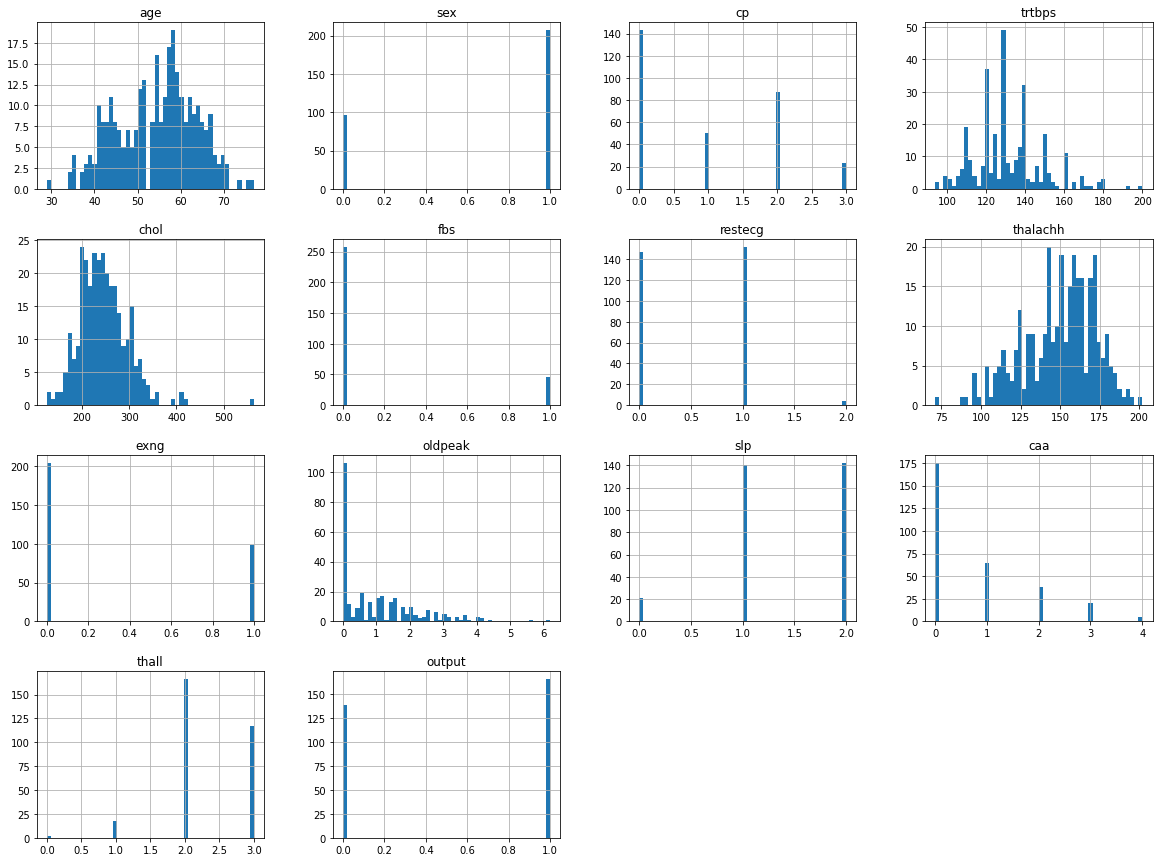

In [3]:
loaded_data.hist(bins=50, figsize=(20,15))

plt.show()

In [4]:
plt.savefig("assets/images/test.png")

<Figure size 432x288 with 0 Axes>

In [5]:
k = loaded_data["age"].head()
k

0    63
1    37
2    41
3    56
4    57
Name: age, dtype: int64

In [6]:
median = sum(k)/len(k)
median

50.8

In [7]:
loaded_data.shape

(303, 14)

In [8]:
#split data into trainingset and testset
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(loaded_data, test_size = 0.2, random_state=42)

In [9]:
len(train_set), len(test_set)

(242, 61)

In [10]:
train_set.shape, test_set.shape

((242, 14), (61, 14))

<AxesSubplot:xlabel='age', ylabel='chol'>

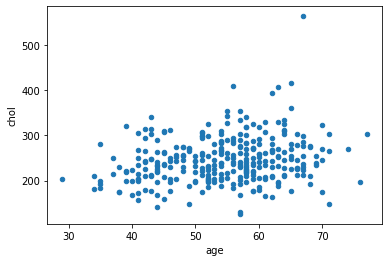

In [11]:
#plot age over choles
loaded_data.plot(kind="scatter", x="age",y="chol")

<AxesSubplot:xlabel='age', ylabel='chol'>

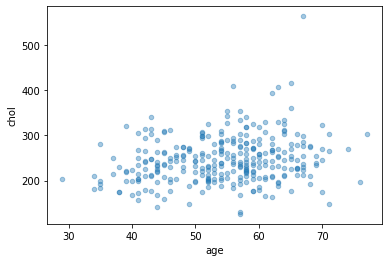

In [12]:
loaded_data.plot(kind="scatter", x="age",y="chol", alpha=0.4)

In [13]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>],
       [<AxesSubplot:xlabel='age', ylabel='thalachh'>,
        <AxesSubplot:xlabel='trtbps', ylabel='thalachh'>,
        <AxesSubplot:xlabel='thalachh', ylabel='thalachh'>,
        <AxesSubplot:xlabel='chol', ylabel='thalachh'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>,
        <AxesSubplot:xlabel='thalachh', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>]], dtype=object)

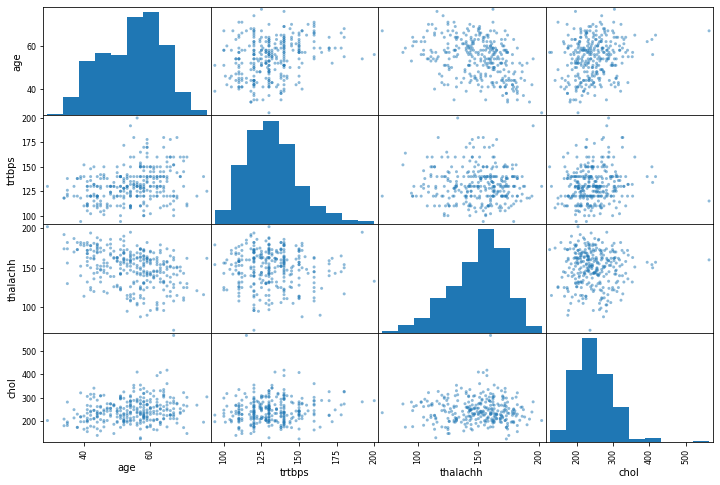

In [14]:
attributes = ["age", "trtbps", "thalachh","chol"]
scatter_matrix(loaded_data[attributes],figsize=(12,8))

In [15]:
#correlation matrix
corr_matrix = loaded_data.corr()

In [16]:
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
trtbps      0.279351
caa         0.276326
chol        0.213678
oldpeak     0.210013
fbs         0.121308
exng        0.096801
thall       0.068001
cp         -0.068653
sex        -0.098447
restecg    -0.116211
slp        -0.168814
output     -0.225439
thalachh   -0.398522
Name: age, dtype: float64

In [17]:
loaded_o2_data = pd.read_csv("archive/o2Saturation.csv") 

In [18]:
loaded_o2_data.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [19]:
loaded_o2_data.shape

(3585, 1)

In [20]:
loaded_data.shape


(303, 14)

In [21]:
attributes += ["sex", "cp", "fbs", "restecg", "exng", "oldpeak"]

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='cp', ylabel='age'>,
        <AxesSubplot:xlabel='fbs', ylabel='age'>,
        <AxesSubplot:xlabel='restecg', ylabel='age'>,
        <AxesSubplot:xlabel='exng', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>,
        <AxesSubplot:xlabel='sex', ylabel='trtbps'>,
        <AxesSubplot:xlabel='cp', ylabel='trtbps'>,
        <AxesSubplot:xlabel='fbs', ylabel='trtbps'>,
        <AxesSubplot:xlabel='restecg', ylabel='trtbps'>,
        <AxesSubplot:xlabel='exng', ylabel='tr

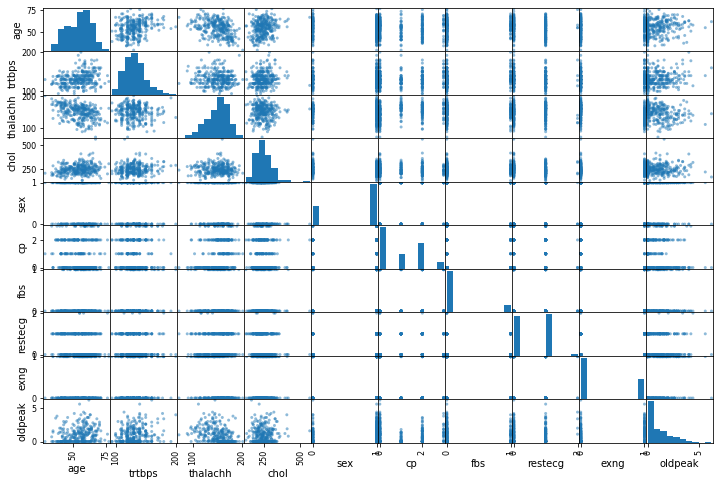

In [22]:
scatter_matrix(loaded_data[attributes],figsize=(12,8))

In [23]:
#data shows that mostly oldpeak could be intrestting including in this scatter matrix 
attributes_2 = ["age", "trtbps", "chol", "thalachh", "oldpeak"]

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='trtbps', ylabel='age'>,
        <AxesSubplot:xlabel='chol', ylabel='age'>,
        <AxesSubplot:xlabel='thalachh', ylabel='age'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='trtbps'>,
        <AxesSubplot:xlabel='trtbps', ylabel='trtbps'>,
        <AxesSubplot:xlabel='chol', ylabel='trtbps'>,
        <AxesSubplot:xlabel='thalachh', ylabel='trtbps'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='trtbps'>],
       [<AxesSubplot:xlabel='age', ylabel='chol'>,
        <AxesSubplot:xlabel='trtbps', ylabel='chol'>,
        <AxesSubplot:xlabel='chol', ylabel='chol'>,
        <AxesSubplot:xlabel='thalachh', ylabel='chol'>,
        <AxesSubplot:xlabel='oldpeak', ylabel='chol'>],
       [<AxesSubplot:xlabel='age', ylabel='thalachh'>,
        <AxesSubplot:xlabel='trtbps', ylabel='thalachh'>,
        <AxesSubplot:xlabel='chol', ylabel='thalachh'>,
        <AxesSubplo

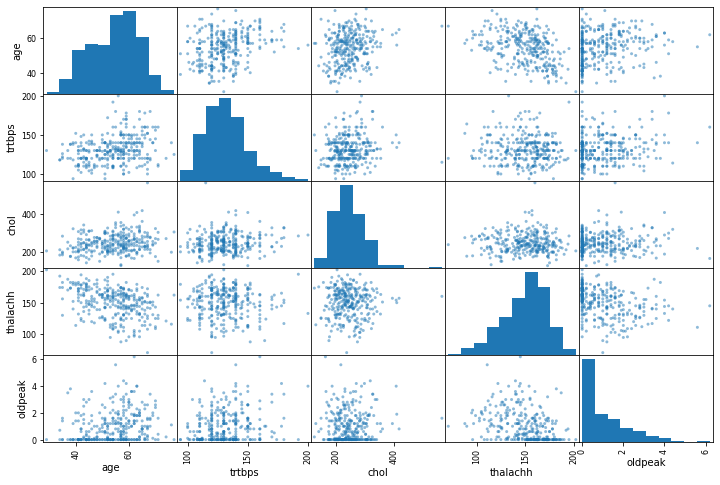

In [24]:
scatter_matrix(loaded_data[attributes_2], figsize=(12,8))

In [25]:
plt.savefig("assets/images/more_attributes_img.png")

<Figure size 432x288 with 0 Axes>

In [26]:
#x = loaded_data
#x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
#y = loaded_data["output"]

In [28]:
#x = pd.DataFrame(x)

In [29]:
#x.drop(columns=["output"])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [76]:
x = loaded_data.iloc[:, 1:-1].values
y = loaded_data.iloc[:, -1].values
x,y

(array([[  1.,   3., 145., ...,   0.,   0.,   1.],
        [  1.,   2., 130., ...,   0.,   0.,   2.],
        [  0.,   1., 130., ...,   2.,   0.,   2.],
        ...,
        [  1.,   0., 144., ...,   1.,   2.,   3.],
        [  1.,   0., 130., ...,   1.,   1.,   3.],
        [  0.,   1., 130., ...,   1.,   1.,   2.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

# Split data into train and test set

In [77]:
train_x, test_x , train_y, test_y = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

# Logistic Regression


In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
log_reg = LogisticRegression()

In [81]:
train_y = np.ravel(train_y)

In [82]:
log_reg.fit(train_x, train_y)

LogisticRegression()

In [83]:
#Lets test if our model works

In [84]:
predicted = log_reg.predict(test_x)

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(test_y, predicted)

array([[21,  6],
       [ 3, 31]])

In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y, predicted)

0.8524590163934426

# K Nearest Neighbours

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
model_knn = KNeighborsClassifier(n_neighbors = 1)
model_knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=1)

In [90]:
predicted = model_knn.predict(test_x)

In [91]:
accuracy_score(test_y, predicted)

0.819672131147541

# Support Vector Machine

In [92]:
from sklearn import svm
model_scv = svm.SVC()
model_scv.fit(train_x, train_y)

predicted = model_scv.predict(test_x)
accuracy_score(test_y, predicted)


0.8688524590163934